# Import Packages
---

In [5]:
import climlab
import numpy as np
import phys
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import DonutFunctions as df
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Import Calculated Heights file from Cluster

In [97]:
heights_calc_raw = xr.open_dataset('Data/Cluster/Combined_data.nc')

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Data/'
ts_2m = xr.open_dataset(path + 'Cluster/ts_2m.nc', decode_times=False) # 2m Temperature dataset
temp = xr.open_dataset(path + 'Cluster/temp.nc', decode_times=False) # Air Temperature dataset

olr_raw = xr.open_dataset(path + 'NCEP Fluxes/csulf.ntat.mon.mean.nc')

olrs = df.regrid_3d(olr_raw.time.values,olr_raw.lon,olr_raw.lat,olr_raw.csulf.values,temp.lon,temp.lat)

lats = temp.lat.values
lons = temp.lon.values
lon_long = temp.lon.values

In [98]:
heights_calc = np.zeros((len(lats), len(lons)))
heights_calc, lons = add_cyclic_point(heights_calc, coord=lons)
lons = temp.lon.values

for i in range(len(lats)):
    for j in range(len(lons)):
        heights_calc[i,j] = heights_calc_raw.height.values[i,j]
        
months_olrs = []
for i in olr_raw.time.values:
    x = pd.to_datetime(i)
    months_olrs.append(x.month)

heights_calc[:,len(lons)] = heights_calc[:,0]
heights_calc = np.flip(heights_calc, axis=0)
    
heights = np.zeros((len(lats), len(lons)))
heights, lon_long = add_cyclic_point(heights, coord=lon_long)
lons = temp.lon.values

C:\Users\richa\Anaconda3\lib\site-packages\cartopy\util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


In [99]:
df.update_progress(0)
for i in range(len(lats)):
    for j in range(len(lons)):
        
        month_list = np.arange(1,13)
        ts_monav = list(ts_2m.sel(lat=lats[i], lon=lons[j]).air.values)
        olr_monav = []
        
        for x in month_list:
            mask = np.array(months_olrs) == x
            olr_monav.append(np.mean(olrs[mask, i, j]))

        heights[i,j] = df.PolyArea(ts_monav,olr_monav) / (max(ts_monav) - min(ts_monav))
        
        df.update_progress(i/len(lats))
        print('Lat:', lats[i], 'Lon:', lons[j])
df.update_progress(1)

Progress: [####################] 100.0%


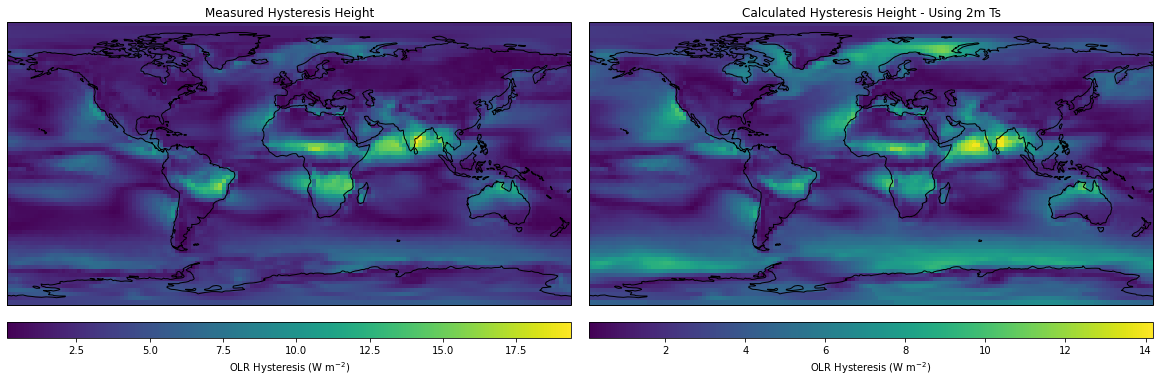

In [8]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1,1]
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)    

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights, transform=ccrs.PlateCarree())
#if samescale:
#    C1.set_clim(vmin=0,vmax=maxheight)
ax1.set_title('Measured Hysteresis Height')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

# --------------------------------
# Plotting the Calculated OLR Map
# --------------------------------

ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, heights_calc, transform=ccrs.PlateCarree())
#if samescale:
#    C2.set_clim(vmin=0,vmax=maxheight)
ax2.set_title('Calculated Hysteresis Height - Using 2m Ts')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
plt.savefig(path + 'Calculated Hysteresis.png', bbox_inches='tight')

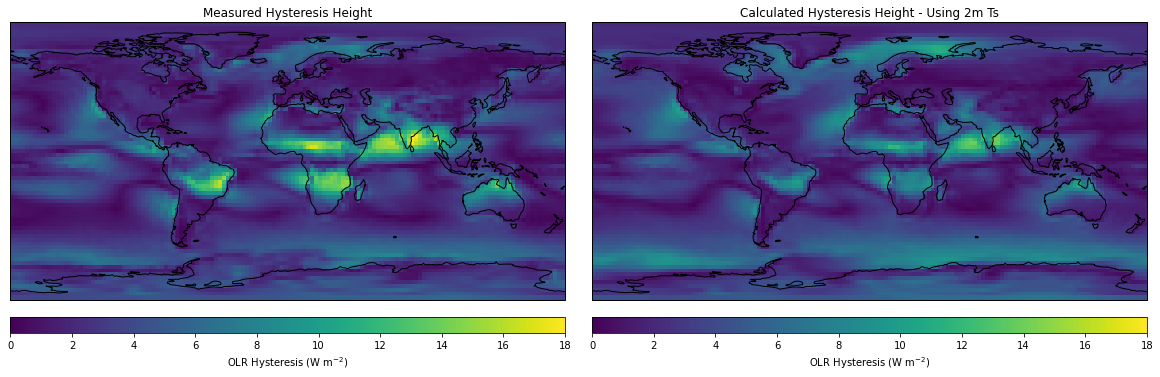

In [9]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1,1]
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)    

maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights, transform=ccrs.PlateCarree())
#if samescale:
C1.set_clim(vmin=0,vmax=maxheight)
ax1.set_title('Measured Hysteresis Height')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

# --------------------------------
# Plotting the Calculated OLR Map
# --------------------------------

ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, heights_calc, transform=ccrs.PlateCarree())
#if samescale:
C2.set_clim(vmin=0,vmax=maxheight)
ax2.set_title('Calculated Hysteresis Height - Using 2m Ts')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
plt.savefig(path + 'Calculated Hysteresis same scale.png', bbox_inches='tight')

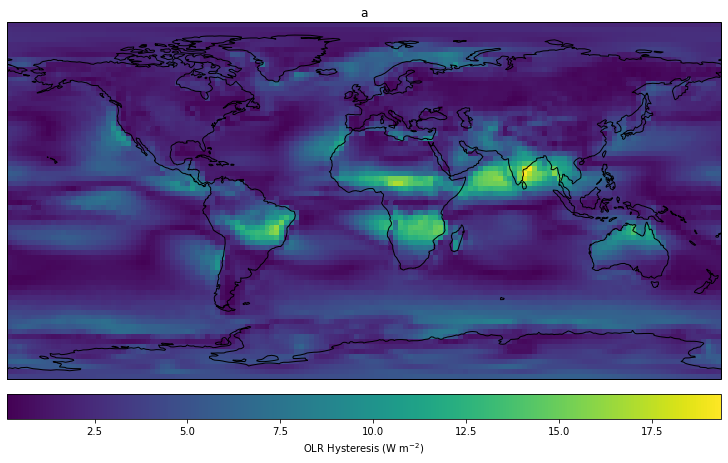

In [22]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

#maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights, transform=ccrs.PlateCarree())
#if samescale:
#C1.set_clim(vmin=0,vmax=maxheight)
ax1.set_title('a')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
plt.savefig(path + 'Calculated Hysteresis single.png', bbox_inches='tight')

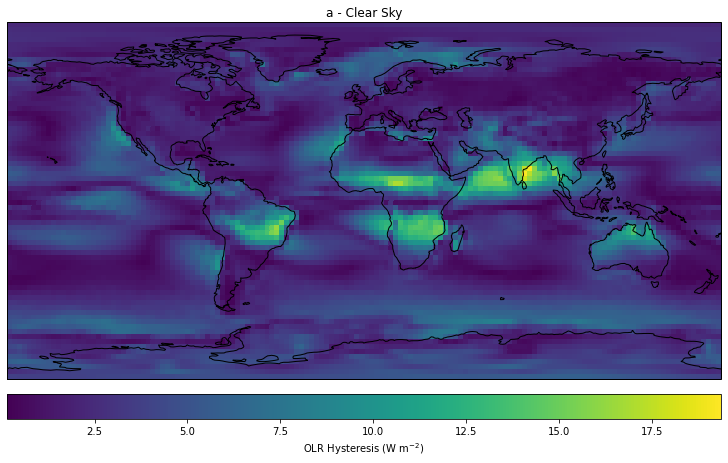

In [100]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

#maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights, transform=ccrs.PlateCarree())
#if samescale:
#C1.set_clim(vmin=0,vmax=maxheight)
ax1.set_title('a - Clear Sky')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
plt.savefig(path + 'clear sky hysteresis.png', bbox_inches='tight')

# Fractional Hysteresis

In [23]:
heights_calc_raw = xr.open_dataset('Data/Cluster/Combined_data.nc')

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Data/'
ts_2m = xr.open_dataset(path + 'Cluster/ts_2m.nc', decode_times=False) # 2m Temperature dataset
temp = xr.open_dataset(path + 'Cluster/temp.nc', decode_times=False) # Air Temperature dataset

olr_raw = xr.open_dataset(path + 'NCEP Fluxes/csulf.ntat.mon.mean.nc')

olrs = df.regrid_3d(olr_raw.time.values,olr_raw.lon,olr_raw.lat,olr_raw.csulf.values,temp.lon,temp.lat)

lats = temp.lat.values
lons = temp.lon.values
lon_long = temp.lon.values

In [24]:
heights_calc = np.zeros((len(lats), len(lons)))
heights_calc, lons = add_cyclic_point(heights_calc, coord=lons)
lons = temp.lon.values

for i in range(len(lats)):
    for j in range(len(lons)):
        heights_calc[i,j] = heights_calc_raw.height.values[i,j] * 100 / np.mean(olrs[:, i, j]) #Change from absolute hysteresis
        
months_olrs = []
for i in olr_raw.time.values:
    x = pd.to_datetime(i)
    months_olrs.append(x.month)

heights_calc[:,len(lons)] = heights_calc[:,0]
heights_calc = np.flip(heights_calc, axis=0)
    
heights = np.zeros((len(lats), len(lons)))
heights, lon_long = add_cyclic_point(heights, coord=lon_long)
lons = temp.lon.values

C:\Users\richa\Anaconda3\lib\site-packages\cartopy\util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


In [25]:
df.update_progress(0)
for i in range(len(lats)):
    for j in range(len(lons)):
        
        month_list = np.arange(1,13)
        ts_monav = list(ts_2m.sel(lat=lats[i], lon=lons[j]).air.values)
        olr_monav = []
        
        for x in month_list:
            mask = np.array(months_olrs) == x
            olr_monav.append(np.mean(olrs[mask, i, j]))

        heights[i,j] = ( df.PolyArea(ts_monav,olr_monav) / (max(ts_monav) - min(ts_monav)) ) * 100 / np.mean(olrs[:, i, j]) #Change from absolute hysteresis
        
        df.update_progress(i/len(lats))
        print('Lat:', lats[i], 'Lon:', lons[j])
df.update_progress(1)

Progress: [####################] 100.0%


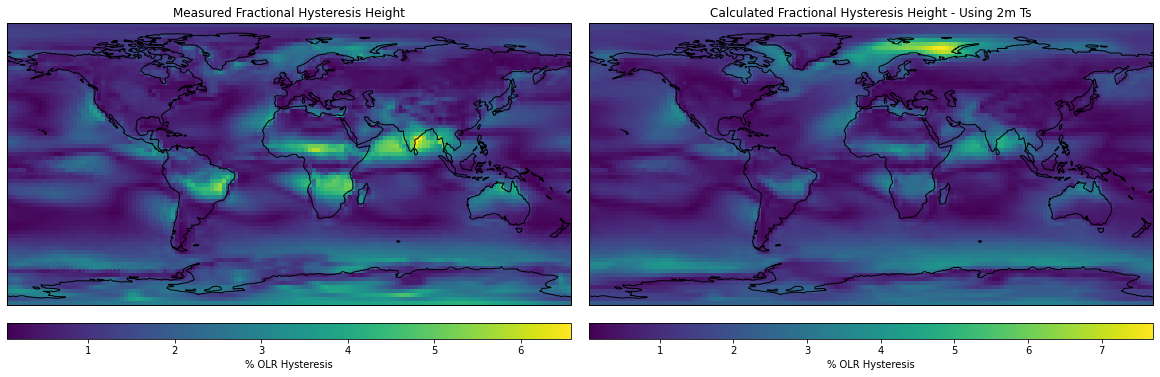

In [26]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1,1]
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)    

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights, transform=ccrs.PlateCarree())
#if samescale:
#    C1.set_clim(vmin=0,vmax=maxheight)
ax1.set_title('Measured Fractional Hysteresis Height')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='% OLR Hysteresis',fraction=0.3, orientation="horizontal")

# --------------------------------
# Plotting the Calculated OLR Map
# --------------------------------

ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, heights_calc, transform=ccrs.PlateCarree())
#if samescale:
#    C2.set_clim(vmin=0,vmax=maxheight)
ax2.set_title('Calculated Fractional Hysteresis Height - Using 2m Ts')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='% OLR Hysteresis',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
plt.savefig(path + 'Fractional Calculated Hysteresis.png', bbox_inches='tight')

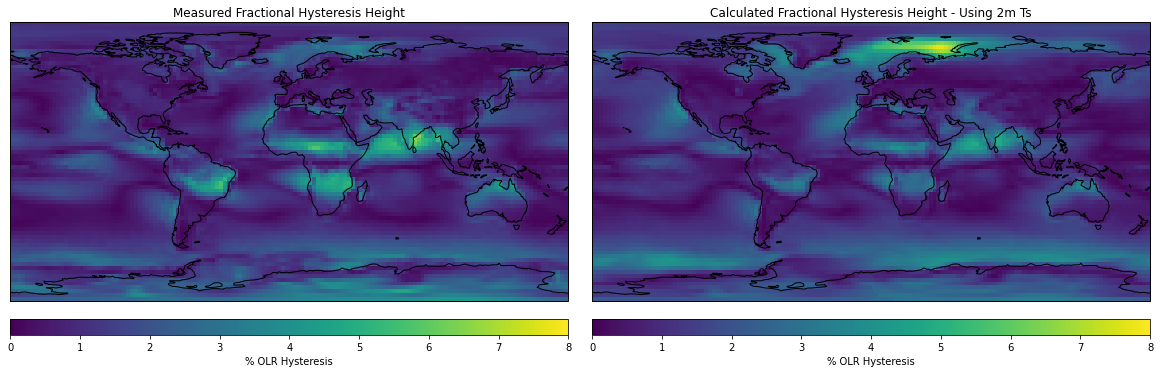

In [29]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1,1]
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)    

maxheight = 8

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights, transform=ccrs.PlateCarree())
#if samescale:
C1.set_clim(vmin=0,vmax=maxheight)
ax1.set_title('Measured Fractional Hysteresis Height')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='% OLR Hysteresis',fraction=0.3, orientation="horizontal")

# --------------------------------
# Plotting the Calculated OLR Map
# --------------------------------

ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, heights_calc, transform=ccrs.PlateCarree())
#if samescale:
C2.set_clim(vmin=0,vmax=maxheight)
ax2.set_title('Calculated Fractional Hysteresis Height - Using 2m Ts')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='% OLR Hysteresis',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
plt.savefig(path + 'Fractional Calculated Hysteresis same scale.png', bbox_inches='tight')

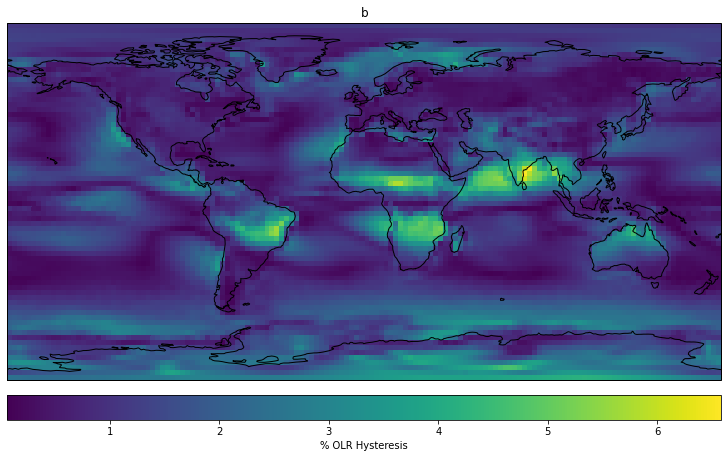

In [28]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

#maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights, transform=ccrs.PlateCarree())
#if samescale:
#C1.set_clim(vmin=0,vmax=maxheight)
ax1.set_title('b')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='% OLR Hysteresis',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
plt.savefig(path + 'Fractional Calculated Hysteresis single.png', bbox_inches='tight')

In [20]:
olrs_grid = np.mean(olrs, axis=0)

In [21]:
lats = temp.lat.values
lons = temp.lon.values
lon_vals = temp.lon.values
levels = temp.level.values

xvals = []
yvals = []
col = []

for i in range(len(lats)-1):
    for j in range(len(lons)):
        xvals.append(olrs_grid[i,j])
        yvals.append(heights[i,j])
        col.append(lats[i])

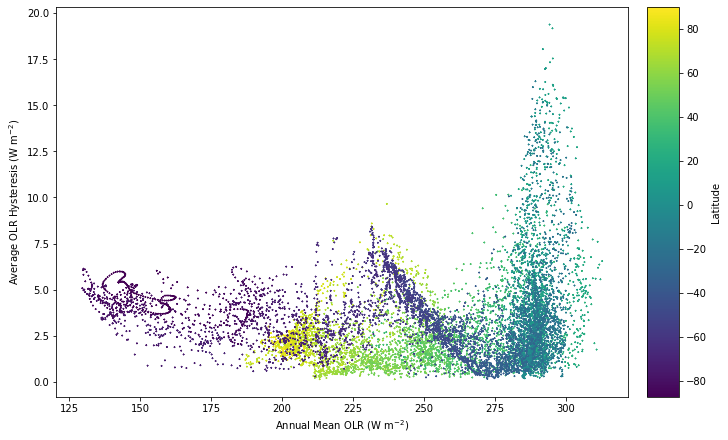

In [26]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)
ax = fig.add_subplot()

plot = ax.scatter(xvals, yvals, s=1, c=col, marker='x', label='Data')
#ax.plot([np.amin(olrs), np.amax(olrs)] ,[np.amin(olrs), np.amax(olrs)], c='C1', label='1:1 Line', linestyle='--')
ax.set_ylabel(r'Average OLR Hysteresis (W m$^{-2}$)')
ax.set_xlabel(r'Annual Mean OLR (W m$^{-2}$)')
fig.colorbar(plot, label='Latitude')
#fig.suptitle('Correlation - Calculated OLR to Observed OLR - 2m Temperature')
#ax.legend()

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
plt.savefig(path + 'Hysteresis against OLR.png', bbox_inches='tight')

# Saving the Heights

In [26]:
heights_nomask = np.zeros((len(lats), len(lons)))

In [27]:
for i in range(len(lats)):
    for j in range(len(lons)):
        heights_nomask[i,j] = heights[i,j]

In [28]:
heights_nomask

array([[2.42412076, 2.4374973 , 2.4524869 , ..., 2.39831701, 2.41253282,
        2.42233849],
       [1.81073413, 1.82220793, 1.8357014 , ..., 1.78200578, 1.78551908,
        1.79538142],
       [1.59094243, 1.56682955, 1.54543299, ..., 1.64485735, 1.63295677,
        1.61958501],
       ...,
       [4.82994455, 4.98400622, 5.11697952, ..., 4.50363784, 4.58433778,
        4.71117484],
       [4.99650267, 5.05744798, 5.11512396, ..., 4.84123158, 4.89157657,
        4.94356747],
       [6.36642969, 6.30337983, 6.23612656, ..., 6.487806  , 6.46743636,
        6.42217507]])

In [30]:
h_data = xr.DataArray(heights_nomask, dims=('lat', 'lon'), coords={'lat': lats, 'lon': lons})
h = xr.Dataset({'height': h_data})

In [33]:
h.to_netcdf('./Data/Cluster/heights_measured.nc')

In [37]:
olrs_global_ltm = np.zeros((len(lats), len(lons), 12))

In [39]:
df.update_progress(0)
for i in range(len(lats)):
    for j in range(len(lons)):
        
        month_list = np.arange(1,13)
        olr_monav = []
        
        for x in month_list:
            mask = np.array(months_olrs) == x
            olr_monav.append(np.mean(olrs[mask, i, j]))
        
        olrs_global_ltm[i,j,:] = olr_monav
        df.update_progress(i/len(lats))
        print('Lat:', lats[i], 'Lon:', lons[j])
df.update_progress(1)

Progress: [####################] 100.0%


In [49]:
months = np.arange(1,13,1)

In [50]:
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [61]:
olr_data = xr.DataArray(olrs_global_ltm, dims=('lat', 'lon', 'month'), coords={'lat': lats, 'lon': lons, 'month': months})
o = xr.Dataset({'olr': olr_data})

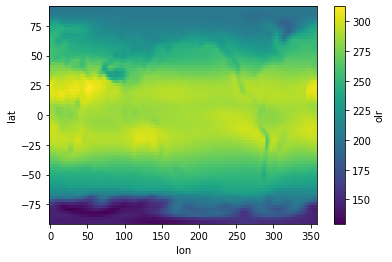

In [62]:
o.mean(dim='month').olr.plot()

In [63]:
o.to_netcdf('./Data/Cluster/olrs_ltmm.nc')

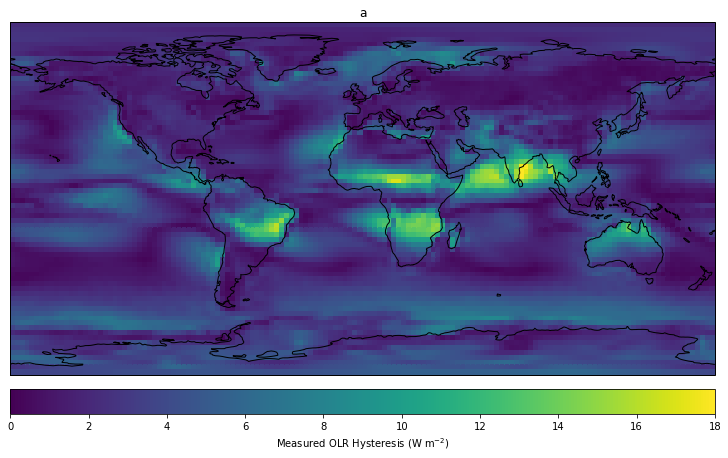

In [30]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

#maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights, transform=ccrs.PlateCarree())
#if samescale:
C1.set_clim(vmin=0,vmax=18)
ax1.set_title('a')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='Measured OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
plt.savefig(path + 'Calculated Hysteresis single.png', bbox_inches='tight')

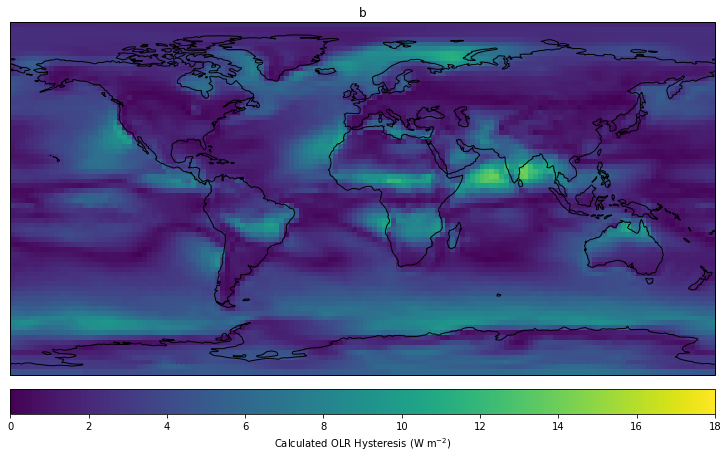

In [28]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1,1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1)    

ax2 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, heights_calc, transform=ccrs.PlateCarree())
#if samescale:
C2.set_clim(vmin=0,vmax=18)
ax2.set_title('b')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='Calculated OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
plt.savefig(path + 'Calc Hysteresis.png', bbox_inches='tight')

In [63]:
diferencemap = heights.copy()

In [68]:
for i in range(len(heights[:,0])):
    for j in range(len(heights[0,:])):
        diferencemap[i,j] = 0
        diferencemap[i,j] = heights_calc[i,j] - heights[i,j]

In [70]:
from matplotlib import cm

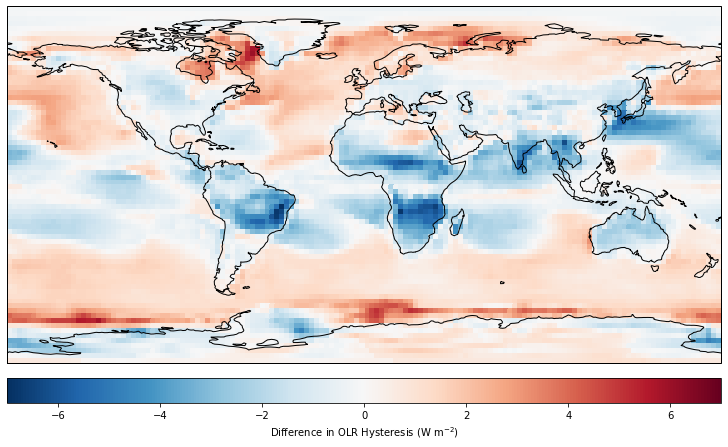

In [72]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1,1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1)    

ax2 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, diferencemap, transform=ccrs.PlateCarree(), cmap=cm.RdBu_r)
#if samescale:
C2.set_clim(vmin=-7,vmax=7)
#ax2.set_title('Difference')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='Difference in OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
plt.savefig(path + 'Diff Hysteresis.png', bbox_inches='tight')

In [48]:
lats = temp.lat.values
lons = temp.lon.values
lon_vals = temp.lon.values
levels = temp.level.values

xvals = []
yvals = []
col = []

for i in range(len(lats)-1):
    for j in range(len(lons)):
        yvals.append(heights_calc[i,j])
        xvals.append(heights[i,j])
        col.append(lats[i])

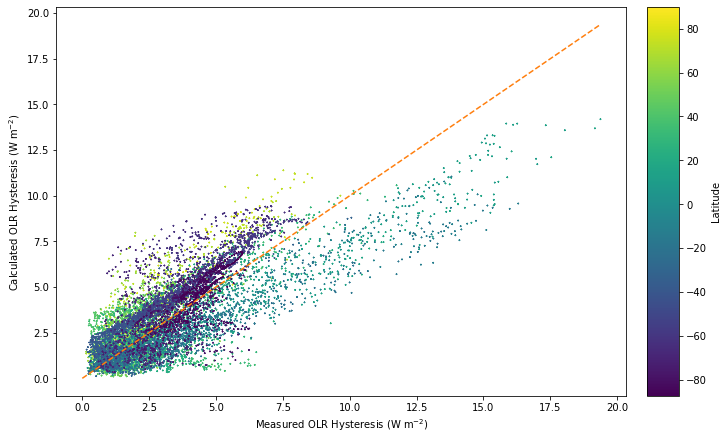

In [49]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)
ax = fig.add_subplot()

plot = ax.scatter(xvals, yvals, s=1, c=col, marker='x', label='Data')
ax.plot([np.amin(heights), np.amax(heights)] ,[np.amin(heights), np.amax(heights)], c='C1', label='1:1 Line', linestyle='--')
ax.set_ylabel(r'Calculated OLR Hysteresis (W m$^{-2}$)')
ax.set_xlabel(r'Measured OLR Hysteresis (W m$^{-2}$)')
fig.colorbar(plot, label='Latitude')
#fig.suptitle('Correlation - Calculated OLR to Observed OLR - 2m Temperature')
#ax.legend()

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
plt.savefig(path + 'Calculated Against Measured Scatter.png', bbox_inches='tight')

In [50]:
diff = []

for i in range(len(yvals)):
    diff.append(yvals[i]-xvals[i])

(array([  1.,   2.,   1.,   1.,   1.,   1.,   4.,   4.,   6.,   4.,   5.,
          9.,  13.,  10.,   7.,   5.,   3.,  13.,  10.,  22.,  13.,  20.,
         19.,  19.,  21.,  22.,  27.,  28.,  24.,  33.,  38.,  53.,  61.,
         54.,  78.,  87., 103.,  86.,  89., 124., 134., 139., 130., 146.,
        166., 185., 204., 228., 283., 241., 359., 474., 542., 466., 375.,
        341., 347., 308., 347., 382., 419., 409., 374., 370., 329., 255.,
        249., 156., 131., 113.,  77.,  75.,  62.,  45.,  55.,  56.,  44.,
         29.,  30.,  22.,  14.,  16.,  26.,  16.,   6.,  16.,   9.,   6.,
          8.,   4.,   7.,   4.,   3.,   5.,   0.,   4.,   3.,   0.,   2.,
          1.]),
 array([-6.98473116, -6.85499219, -6.72525321, -6.59551424, -6.46577527,
        -6.33603629, -6.20629732, -6.07655834, -5.94681937, -5.8170804 ,
        -5.68734142, -5.55760245, -5.42786347, -5.2981245 , -5.16838552,
        -5.03864655, -4.90890758, -4.7791686 , -4.64942963, -4.51969065,
        -4.38995168, -4.26

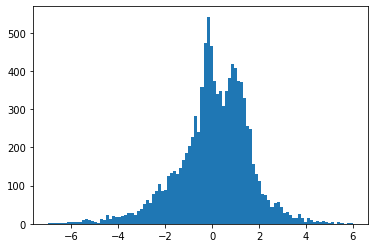

In [51]:
plt.hist(diff, bins=100)

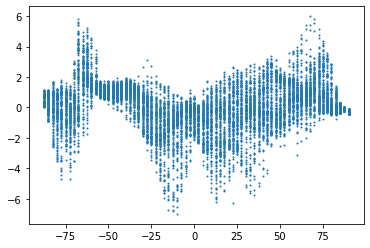

In [52]:
plt.scatter(col, diff,s=1)

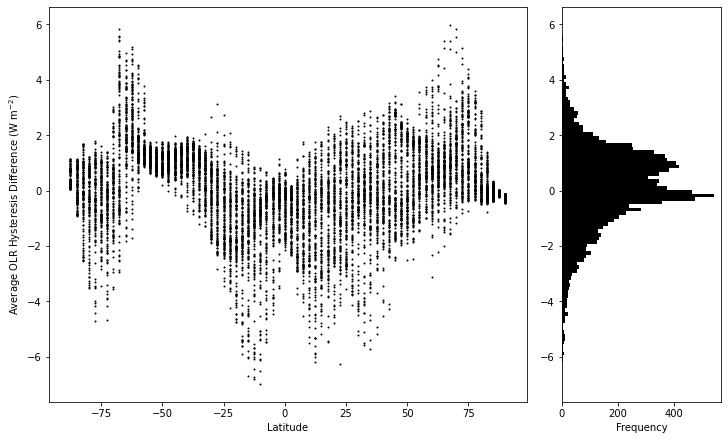

In [53]:
widths = [3,1]
fig = plt.figure(figsize=(10,6),constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)    

ax1 = fig.add_subplot(gs[0])
ax1.scatter(col, diff, s=1, c='black')
ax1.set_xlabel('Latitude')
ax1.set_ylabel(r'Average OLR Hysteresis Difference (W m$^{-2}$)')
#ax1.set_title('Absolute Difference')

ax2 = fig.add_subplot(gs[1])
ax2.hist(diff, bins=100, orientation="horizontal", color='black')
ax2.set_xlabel('Frequency')
#ax2.set_title('Absolute Difference')

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
plt.savefig(path + 'hysteresis difference.png', bbox_inches='tight')

In [73]:
path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python'
rad = xr.open_dataset(path + '/Data/CERES/CERES_EBAF-TOA_Ed4.1_Subset_200003-201906.nc')
    

# Allsky Map

In [103]:
path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Data/'
olr_raw = xr.open_dataset(path + 'ulwrf.ntat.mon.ltm.nc')


C:\Users\richa\Anaconda3\lib\site-packages\xarray\coding\times.py:465: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\richa\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [104]:
olr_raw

<xarray.Dataset>
Dimensions:             (lat: 94, lon: 192, nbnds: 2, time: 12)
Coordinates:
  * lat                 (lat) float32 88.542 86.6531 ... -86.6531 -88.542
  * lon                 (lon) float32 0.0 1.875 3.75 ... 354.375 356.25 358.125
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    ulwrf               (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    description:                    Data is from NMC initialized reanalysis\n...
    platform:                       Model
    Conventions:                    COARDS
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/07/12 by doMonthLTM\nConvert...
    title:                          monthly ltm ulwrf.ntat from the NCEP Rean...
    dataset_title:              

In [105]:
heights_calc_raw = xr.open_dataset('Data/Cluster/Combined_data.nc')

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Data/'
ts_2m = xr.open_dataset(path + 'Cluster/ts_2m.nc', decode_times=False) # 2m Temperature dataset
temp = xr.open_dataset(path + 'Cluster/temp.nc', decode_times=False) # Air Temperature dataset

olr_raw = xr.open_dataset(path + 'ulwrf.ntat.mon.ltm.nc', decode_times=False)

olrs = df.regrid_3d(olr_raw.time.values,olr_raw.lon,olr_raw.lat,olr_raw.ulwrf.values,temp.lon,temp.lat)

lats = temp.lat.values
lons = temp.lon.values
lon_long = temp.lon.values

In [106]:
heights_calc = np.zeros((len(lats), len(lons)))
heights_calc, lons = add_cyclic_point(heights_calc, coord=lons)
lons = temp.lon.values

for i in range(len(lats)):
    for j in range(len(lons)):
        heights_calc[i,j] = heights_calc_raw.height.values[i,j]
        
months_olrs = []
for i in olr_raw.time.values:
    x = pd.to_datetime(i)
    months_olrs.append(x.month)

C:\Users\richa\Anaconda3\lib\site-packages\cartopy\util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


In [107]:
heights_calc[:,len(lons)] = heights_calc[:,0]
heights_calc = np.flip(heights_calc, axis=0)
    
heights = np.zeros((len(lats), len(lons)))
heights, lon_long = add_cyclic_point(heights, coord=lon_long)
lons = temp.lon.values

In [87]:
df.update_progress(0)
for i in range(len(lats)):
    for j in range(len(lons)):
        
        month_list = np.arange(1,13)
        ts_monav = list(ts_2m.sel(lat=lats[i], lon=lons[j]).air.values)

        heights[i,j] = df.PolyArea(ts_monav,list(olrs[:,i,j])) / (max(ts_monav) - min(ts_monav))
        
        df.update_progress(i/len(lats))
        print('Lat:', lats[i], 'Lon:', lons[j])
df.update_progress(1)

Progress: [####################] 100.0%


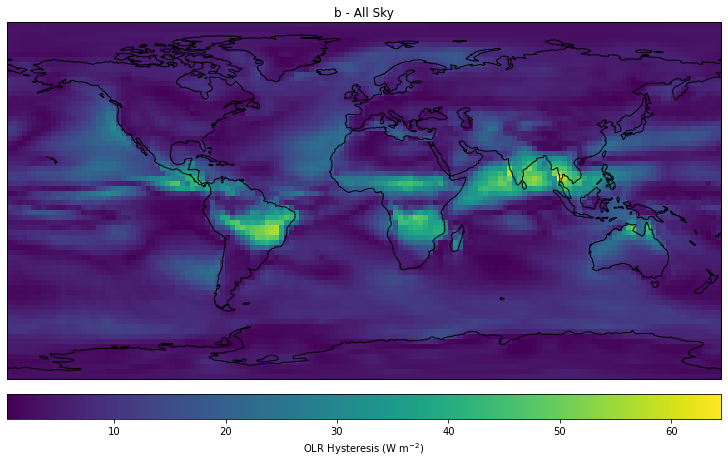

In [88]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

#maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights, transform=ccrs.PlateCarree())
#if samescale:
#C1.set_clim(vmin=0,vmax=18)
ax1.set_title('b - All Sky')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
plt.savefig(path + 'all sky hysteresis.png', bbox_inches='tight')

# Fractional All Sky

In [108]:
heights_frac = np.zeros((len(lats), len(lons)))
lon2 = temp.lon.values
heights_frac, lon2 = add_cyclic_point(heights_frac, coord=lon2)
lons = temp.lon.values

In [109]:
df.update_progress(0)
for i in range(len(lats)):
    for j in range(len(lons)):
        
        month_list = np.arange(1,13)
        ts_monav = list(ts_2m.sel(lat=lats[i], lon=lons[j]).air.values)

        heights_frac[i,j] = ( df.PolyArea(ts_monav,list(olrs[:,i,j])) / (max(ts_monav) - min(ts_monav)) / np.mean(olrs[:,i,j]) ) * 100
        
        df.update_progress(i/len(lats))
        print('Lat:', lats[i], 'Lon:', lons[j])
df.update_progress(1)

Progress: [####################] 100.0%


In [144]:
np.amax(heights_frac)

26.893404609270938

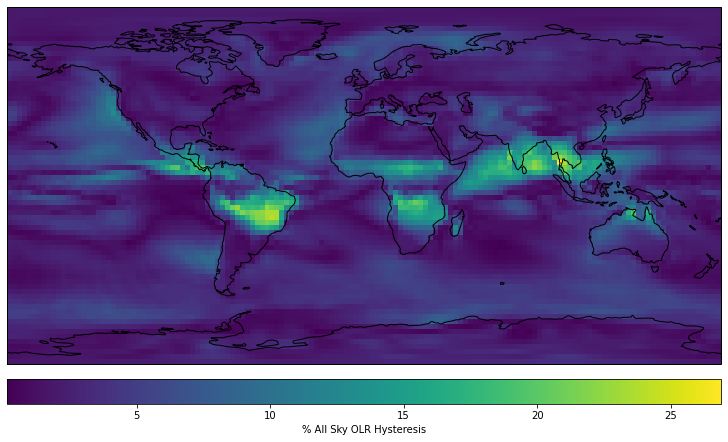

In [111]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

#maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights_frac, transform=ccrs.PlateCarree())
#if samescale:
#C1.set_clim(vmin=0,vmax=18)
#ax1.set_title('b - All Sky')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='% All Sky OLR Hysteresis',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
plt.savefig(path + 'all sky hysteresis fractional.png', bbox_inches='tight')

In [118]:
path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Data/'
olr_raw_clr = xr.open_dataset(path + 'NCEP Fluxes/csulf.ntat.mon.mean.nc')

In [127]:
olr_raw_clr.mean(dim='time').csulf.values.shape

(94, 192)

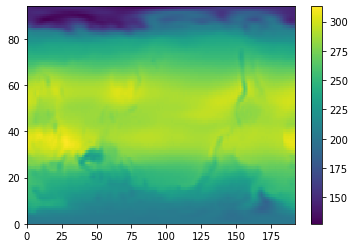

In [129]:
plt.pcolor(olr_raw_clr.mean(dim='time').csulf.values)
plt.colorbar()

In [132]:
clrs = olr_raw_clr.mean(dim='time').csulf.values

In [135]:
clrslong = clrs.reshape(18048)

(array([  8.,  21.,  30.,  38.,  44.,  41.,  76.,  61.,  84.,  95.,  86.,
         64.,  47.,  53.,  48.,  37.,  40.,  31.,  42.,  39.,  28.,  31.,
         42.,  19.,  22.,  24.,  31.,  31.,  36.,  61.,  56.,  60.,  74.,
         89.,  82.,  60.,  81.,  80., 128., 216., 407., 403., 257., 233.,
        207., 202., 180., 201., 165., 127., 162., 163., 144., 154., 130.,
        167., 186., 196., 252., 260., 258., 263., 280., 214., 287., 288.,
        300., 296., 246., 263., 217., 192., 237., 185., 209., 215., 188.,
        225., 174., 248., 218., 276., 337., 388., 560., 701., 991., 923.,
        818., 471., 344., 244., 174., 114.,  95.,  82.,  59.,  17.,  10.,
          9.]),
 array([127.44656, 129.30154, 131.15651, 133.01149, 134.86647, 136.72145,
        138.57642, 140.4314 , 142.28638, 144.14134, 145.99632, 147.8513 ,
        149.70628, 151.56125, 153.41623, 155.27121, 157.12619, 158.98116,
        160.83614, 162.69112, 164.54608, 166.40106, 168.25604, 170.11102,
        171.96599, 173

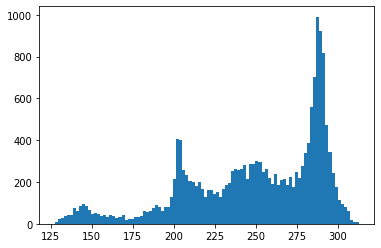

In [136]:
plt.hist(clrslong, bins=100)

(array([  8.,  27.,  28.,  31.,  59.,  39.,  79.,  83., 122.,  61.,  81.,
         48.,  42.,  53.,  34.,  53.,  54.,  38.,  60.,  52.,  33.,  44.,
         51.,  46.,  53.,  87.,  92., 131., 115., 145., 119., 189., 342.,
        621., 688., 414., 294., 290., 310., 272., 300., 267., 286., 297.,
        314., 356., 299., 317., 306., 279., 282., 242., 258., 281., 301.,
        279., 291., 279., 271., 281., 277., 283., 271., 252., 276., 278.,
        246., 292., 273., 290., 299., 285., 310., 304., 259., 261., 227.,
        208., 210., 169., 167., 141., 144., 122., 137., 130.,  96., 117.,
         94., 114., 107.,  48.,  35.,  28.,  26.,  37.,  27.,  14.,  12.,
          8.]),
 array([128.3496 , 130.1396 , 131.92961, 133.7196 , 135.50961, 137.29962,
        139.08963, 140.87964, 142.66963, 144.45964, 146.24965, 148.03966,
        149.82965, 151.61966, 153.40967, 155.19968, 156.98969, 158.77968,
        160.56969, 162.3597 , 164.1497 , 165.93971, 167.7297 , 169.51971,
        171.30972, 173

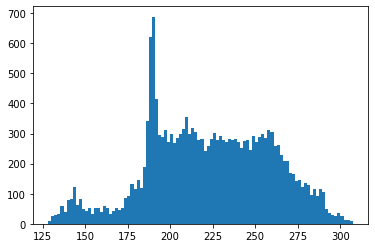

In [142]:
plt.hist(allslong, bins=100)

In [137]:
alls = olr_raw.mean(dim='time').ulwrf.values

In [140]:
allslong = alls.reshape(18048)

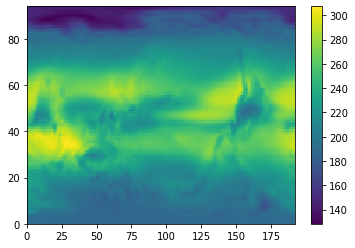

In [130]:
plt.pcolor(olr_raw.mean(dim='time').ulwrf.values)
plt.colorbar()